# Flowing liquid foam - Strain & Stress fields

In this tutorial you will learn to measure liquid fraction and individual bubble radius from respectively phase-segmented (cleaned) and bubble segmented (no-edge) images.
    
The tutorial is divided in the following sections:
- Import libraries
- Quantification folders
- Get familiar with the input data
- Strain - Shape tensor
- Strain - Texture tensor
- Stress - Batchelor tensor

## A) Import libraries

In [1]:
from FoamQuant import *
import numpy as np
import skimage as ski 
import os
import matplotlib.pyplot as plt; plt.rc('font', size=20) 
from tifffile import imread
from scipy import ndimage
import pickle as pkl
import pandas as pd

## B) Quantification folders

In [2]:
# Processing folders names
Quant_Folder = ['Q3_Bubble_Prop','Q4_Topology','Q5_Texture','Q6_Stress']

# Create the quantification folders (where we are going to save our results)
for Pi in Quant_Folder:
    if  os.path.exists(Pi):
        print('path already exist:',Pi)
    else:
        print('Created folder:',Pi)
        os.mkdir(Pi)

path already exist: Q3_Bubble_Prop
path already exist: Q4_Topology
path already exist: Q5_Texture
path already exist: Q6_Stress


Let's read the first bubble-segmented image of the series (with no bubble on the edges). 

## C) Get familiar with the input data

/gpfs/offline1/staff/tomograms/users/flosch/Rheometer_Jupyter/Jupy_FoamQuant/FoamQuant/Figure.py:90: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


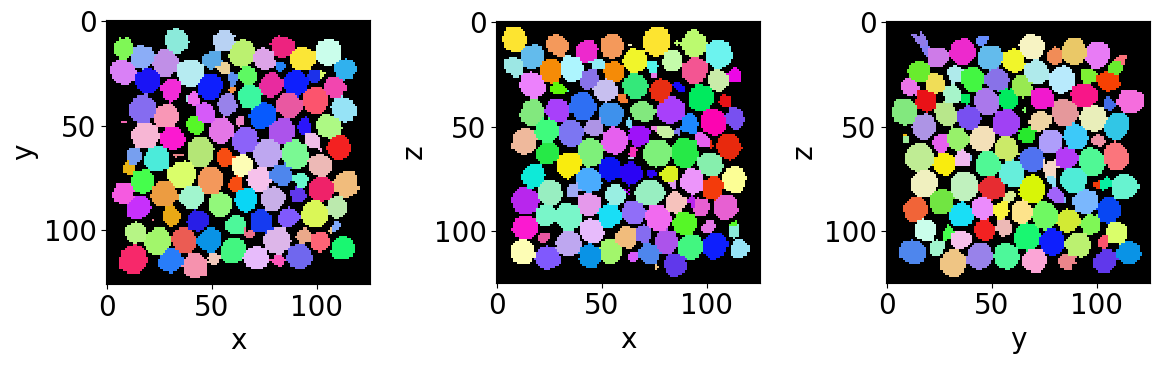

In [3]:
# Name and directory of  the no-edge bubble segmented images
dirnoedge = 'P5_BubbleNoEdge/'
namenoedge = 'BubbleNoEdge_'

# Read the first image of the series
Lab = imread(dirnoedge+namenoedge+strindex(1, 3)+'.tiff')

# Since we are now looking at more bubbles let's create a "larger" random colormap: here 500 random colors
rcmap = RandomCmap(500, verbose=False)

# Show a 3D-cut view of the volume
Cut3D(Lab,  
      nameaxes=['z','y','x'],
      cmap=rcmap, 
      interpolation='nearest', 
      figblocksize=4)

## D) Strain - Measured from the bubble region (shape tensor)
The shape strain tensor $U_S$ is computed from the shape tensor $S$. Each bubble is represented by a set of coordinates {$\textbf{r}$} of all the voxels defining its region in the image. From this set can be defined both the center of mass coordinates, $\langle \textbf{r} \rangle$, and the shape tensor as

\begin{equation}
    \textbf{S}=\langle(\textbf{r}-\langle \textbf{r} \rangle)  \otimes (\textbf{r}-\langle \textbf{r} \rangle)\rangle^{1/2}
\end{equation}

The strain tensors $\textbf{U}_\textbf{S}$ is derived from $\textbf{S}$ as the deviation from an isotropic shape $\mathbf{S_0}$ state (a perfect sphere):
\begin{equation}
    \textbf{U}_\textbf{S} =   \log(\textbf{S}) - \log(\mathbf{S_0}) 
\end{equation}

with $\mathbf{S_0} = S_0 \textbf{Id}$ and $\textbf{Id}$ the identity tensor. The isotropic state is build from the three shape tensor eigenvalues $\lambda_i$ as $S_0 = (\lambda_1 \lambda_2 \lambda_3)^{1/3}$. 

The shape tensor is already included in the saved properties by the **RegionProp_Batch** function.

In [4]:
# Name and directory where we are going to save the bubble region properties
dir_Bubble_prop = 'Q3_Bubble_Prop/'
name_Bubble_prop = 'Bubble_Prop_'

# Indexes of the images of our time-series (we are working here with 10 subsequent images of the same foam sample, evolving over time).
imrange = [1,2,3,4,5,6,7,8,9,10]

RegionProp_Batch(namenoedge,
                 name_Bubble_prop,
                 dirnoedge,
                 dir_Bubble_prop,
                 imrange,
                 verbose=True,
                 endread='.tiff',
                 endsave='.tsv')

Path exist: True
Bubble_Prop_001: done
Bubble_Prop_002: done
Bubble_Prop_003: done
Bubble_Prop_004: done
Bubble_Prop_005: done
Bubble_Prop_006: done
Bubble_Prop_007: done
Bubble_Prop_008: done
Bubble_Prop_009: done
Bubble_Prop_010: done


Let's open the first saved bubble-properties table with **pandas**.

In [5]:
df = pd.read_csv(dir_Bubble_prop+name_Bubble_prop+strindex(1,n0=3)+'.tsv',sep = '\t')
display(df)

,lab,z,y,x,vol,rad,area,sph,volfit,S1,...,e2y,e2x,e3z,e3y,e3x,U1,U2,U3,U,type
0,1,6.661077,57.085613,65.375993,1133.0,6.467162,529.207274,0.998627,1142.398114,6.237956,...,6.728715,0.117552,-0.107005,0.117552,6.388462,-0.038838,-0.019058,0.057897,0.088518,-1
1,2,7.576789,85.936300,50.280105,1146.0,6.491803,533.385277,0.997801,1154.519766,6.243540,...,6.682162,-0.069400,-0.082819,-0.069400,6.303276,-0.041462,-0.033346,0.074808,0.112432,-1
2,3,7.570736,87.444767,108.598837,1032.0,6.268982,497.047442,0.998908,1040.301280,6.071228,...,6.154835,-0.116499,0.204781,-0.116499,6.264697,-0.034724,-0.016820,0.051543,0.078854,-1
3,4,8.201754,15.444444,68.452242,1026.0,6.256809,496.236802,0.997505,1035.571103,5.810319,...,6.192980,-0.266247,0.174190,-0.266247,6.173020,-0.077130,0.026566,0.050564,0.117547,1
4,5,7.827060,16.074262,110.963377,983.0,6.168151,484.463256,0.997458,998.865323,5.807303,...,5.948497,-0.218520,-0.176608,-0.218520,6.147211,-0.065620,-0.006864,0.072484,0.120043,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,910,116.492625,18.975418,46.282203,1017.0,6.238461,492.277318,0.997594,1023.339198,5.845628,...,6.323806,-0.043935,-0.116745,-0.043935,6.269451,-0.067111,-0.000255,0.067366,0.116461,-1
910,911,115.678241,65.150463,84.888889,864.0,5.908470,441.002150,0.999271,869.881179,5.697289,...,6.089410,0.036148,0.032631,0.036148,5.939960,-0.038658,0.003756,0.034902,0.063953,1
911,912,116.231437,104.715526,42.981678,1037.0,6.279090,500.232203,0.999165,1050.719468,6.109016,...,6.577079,-0.077785,-0.035127,-0.077785,6.228199,-0.031840,-0.012748,0.044588,0.068896,-1
912,913,117.108756,16.835023,25.201843,1085.0,6.374513,513.848344,0.997691,1091.492266,6.052830,...,6.305141,0.006104,-0.192089,0.006104,6.123454,-0.053770,-0.020379,0.074150,0.114923,-1


Let's keep the shape tensor tensor columns

In [6]:
#Shape tensor
df[['e1z','e1y','e1x',
    'e2z','e2y','e2x',
    'e3z','e3y','e3x']]

,e1z,e1y,e1x,e2z,e2y,e2x,e3z,e3y,e3x
0,6.354887,-0.211241,-0.107005,-0.211241,6.728715,0.117552,-0.107005,0.117552,6.388462
1,6.565883,0.368782,-0.082819,0.368782,6.682162,-0.069400,-0.082819,-0.069400,6.303276
2,6.450833,-0.076502,0.204781,-0.076502,6.154835,-0.116499,0.204781,-0.116499,6.264697
3,6.491207,0.206515,0.174190,0.206515,6.192980,-0.266247,0.174190,-0.266247,6.173020
4,6.537665,0.134854,-0.176608,0.134854,5.948497,-0.218520,-0.176608,-0.218520,6.147211
...,...,...,...,...,...,...,...,...,...
909,6.189208,0.396155,-0.116745,0.396155,6.323806,-0.043935,-0.116745,-0.043935,6.269451
910,5.744228,-0.123420,0.032631,-0.123420,6.089410,0.036148,0.032631,0.036148,5.939960
911,6.124738,-0.024406,-0.035127,-0.024406,6.577079,-0.077785,-0.035127,-0.077785,6.228199
912,6.761401,0.199871,-0.192089,0.199871,6.305141,0.006104,-0.192089,0.006104,6.123454


Individual bubbles are often highly deformed in what looks like random deformations. In order to extract the strain field of the structure, without this local "noize", we spatially average the shape of the bubble inside boxes. Only after averaging, the average strain is computed from the average shape tensor.

First, let's reshape our table in form of two lists: a list for the centroid coordinates and one for the shape tensors.

In [7]:
LCoord = np.asarray(df[['z','y','x']])

numpy_shape = np.asarray(df[['e1z','e1y','e1x',
                             'e2z','e2y','e2x',
                             'e3z','e3y','e3x']])
LShape=[]
for bbli in range(len(numpy_shape)):
    LShape.append(numpy_shape[bbli].reshape(3,3))

Now that we have the data in this format, one can perform a cartesian-grid average. Here we choose to have 5x5x5 boxes over the pixel coordinates [0,125] along z,y and x. We choose to return the result in a structured format.

In [8]:
Grids, CoordGrd, ShapeAVG, ShapeSTD, ShapeCount = Grid_Tavg(LCoord, 
                                                            LShape, 
                                                            Range = [0,125,0,125,0,125],
                                                            N=[5,5,5], 
                                                            NanFill=True, #<- if no bubble in a box, fill with a nan value
                                                            structured=True)

In [9]:
# Averaged shape tensor in the fist [0,0,0] box
ShapeAVG[0][0][0]

array([[ 6.29865145,  0.1757332 , -0.1352297 ],
       [ 0.1757332 ,  6.16544328,  0.16994142],
       [-0.1352297 ,  0.16994142,  6.30239316]])

In [10]:
# The associated strain tensor
USfromS(ShapeAVG[0][0][0])

array([[ 0.00696853,  0.02851242, -0.0218597 ],
       [ 0.02851242, -0.01455694,  0.02758429],
       [-0.0218597 ,  0.02758429,  0.00758841]])

To have a bit more a feeling of this strain tensor field, one can use the following representation, using ellipses. If you wish to learn about this representation, have a look at the following paper: [Three-dimensional liquid foam flow through a hopper resolved by fast X-ray microtomography](https://pubs.rsc.org/en/content/articlelanding/2023/sm/d2sm01299e). **CutTensor3D** work similarly than **Cut3D**. It represents the three orthogonal cuts of the tensorial space.

Normal min/max ax0 -0.014492509196547583 0.033930867715730055
Normal min/max ax1 -0.032242297648117375 0.010851178749433667
Normal min/max ax2 -0.03491523459848728 0.019630372984758657


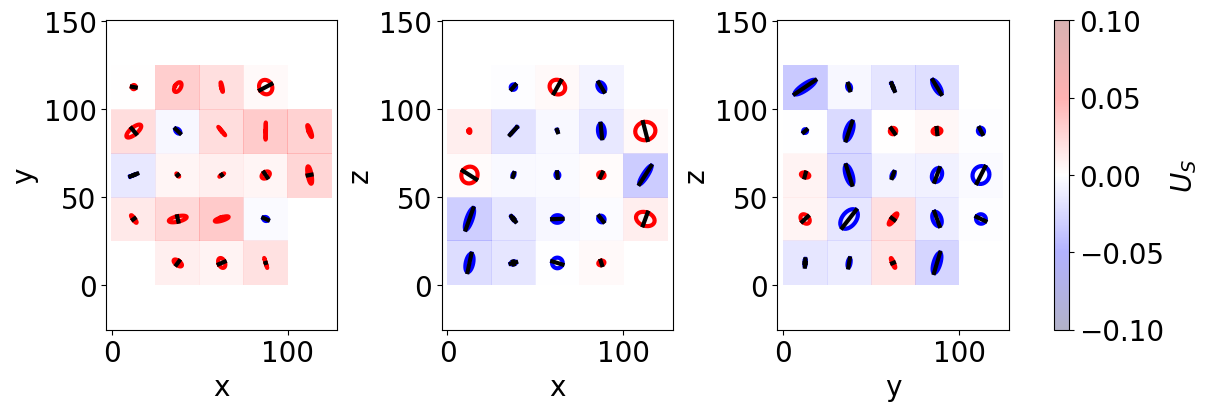

In [11]:
CutTensor3D(Grids,
            CoordGrd,
            ShapeAVG, 
            ShapeCount,
            scale_factor = 150,
            figblocksize=4,
            vmin=-0.1,
            vmax=0.1,
            Countmin=5, #<- shows a symbol if there is al least 5 bubble in the average box
            showscale=False,
            nameaxes=['z','y','x'],
            DeviatoricType=2, #<- 2 for dealing with shape: Shape -> Strain
            colorbarlab=r'$U_S$') 

We can also do the same for the whole time-resolved data. Since we have only a small number of bubbles, it is going to smooth a bit the dentencies.
In addition we can use **ProjTensor3D**, which average even more along the whole volume.

In [12]:
# Take into acount the whole time serie data
LLCoord=[]
LLShape=[]
for imi in range(len(imrange)):
    df = pd.read_csv(dir_Bubble_prop+name_Bubble_prop+strindex(imrange[imi],n0=3)+'.tsv',sep = '\t')

    LCoord = np.asarray(df[['z','y','x']])

    numpy_shape = np.asarray(df[['e1z','e1y','e1x',
                                 'e2z','e2y','e2x',
                                 'e3z','e3y','e3x']])
    LShape=[]
    for bbli in range(len(numpy_shape)):
        LShape.append(numpy_shape[bbli].reshape(3,3))

    LLCoord.append(LCoord)
    LLShape.append(LShape)

Grids_2, CoordGrd_2, ShapeAVG_2, ShapeSTD_2, ShapeCount_2 = Grid_Tavg(np.concatenate(LLCoord), 
                                                            np.concatenate(LLShape), 
                                                            Range = [0,125,0,125,0,125],
                                                            N=[5,5,5], 
                                                            NanFill=True,
                                                            verbose=False,
                                                            structured=True)

Normal min/max ax0 0.0024188430575035006 0.025238664552525682
Normal min/max ax1 -0.021390368960705185 0.009303289768458225
Normal min/max ax2 -0.022187499174558964 0.010575788442407356


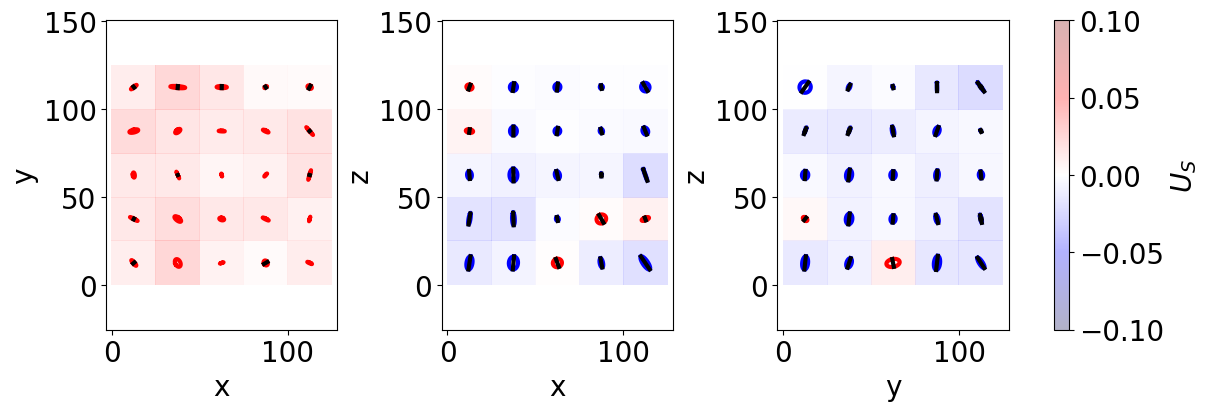

In [13]:
ProjTensor3D(Grids_2,
            CoordGrd_2,
            ShapeAVG_2, 
            ShapeCount_2,
            scale_factor = 150,
            figblocksize=4,
            vmin=-0.1,
            vmax=0.1,
            Countmin=5,
            showscale=False,
            nameaxes=['z','y','x'],
            DeviatoricType=2, #<- 2 for dealing with shape: Shape -> Strain
            colorbarlab=r'$U_S$')

## E) Strain - Measured from the distance between neighbooring bubbles (texture tensor)
We can now do the exact same steps, extracting the strain field but working with the texture tensor. 

Each bubble is also characterized by a set of link vectors \{$\mathbf{l}$\} between its center and the neighboring bubble centers. The texture tensor associated to each bubble is defined as

\begin{equation}
    \textbf{M}=\langle \mathbf{l}  \otimes \mathbf{l} \rangle
\end{equation}
with $\langle ... \rangle$ the average over the set of neighboring bubbles. 

The strain tensor $\textbf{U}_\textbf{M}$ is derived from $\textbf{M}$ as the deviation from an isotropic texture $\mathbf{M_0}$ state:
\begin{equation}
    \textbf{U}_\textbf{M} = \frac{1}{2} \left( \log(\textbf{M}) - \log(\mathbf{M_0}) \right)
\end{equation}

The isotropic texture $\mathbf{M_0}$ is constructed in the same manner. It is important to note that the factor $\frac{1}{2}$ accounts for the difference in dimensionality: the texture tensor has units of length squared, whereas the shape tensor has units of length. Note that the texture tensor tends to be less noisy than the shape tensor in dry foams, but more noisy in wet foams. This was attributed to the decrease in the average coordination number $Z$ and area of contact $A$ between the bubbles when the liquid fraction $\phi_\ell$ increases.

Anyway, let's get this texture tensor from our images. For this we have to start by extracting the contact topology between our bubble (which bubble is in contact with which). We use **GetContacts_Batch** and indicate that we just want the contact table **save='table'**. This function is wrapping **spam.label.contacts.labelledContacts** from the SPAM toolbox [spam.label.contacts.labelledContacts](https://www.spam-project.dev/docs/spam.label.html#module-spam.label.contacts).

In [14]:
# Name and directory where we are going to save the contact topology
dirbubbleseg = 'P4_BubbleSegmented/'
namebubbleseg = 'BubbleSeg_'

dirnoedge = 'P5_BubbleNoEdge/'
namenoedge = 'BubbleNoEdge_'

dir_Topo = 'Q4_Topology/'
name_Topo = 'Topology_'

GetContacts_Batch(namebubbleseg,
                  namenoedge,
                  name_Topo,
                  dirbubbleseg,
                  dirnoedge,
                  dir_Topo,
                  imrange,
                  verbose=True,
                  endread='.tiff',
                  endread_noedge='.tiff',
                  endsave='.tiff',
                  n0=3,
                  save='table', # <- save the topology table
                  maximumCoordinationNumber=20)

Path exist: True
Topology_001: done
Topology_002: done
Topology_003: done
Topology_004: done
Topology_005: done
Topology_006: done
Topology_007: done
Topology_008: done
Topology_009: done
Topology_010: done


The contact table is looking like this, for each central bubble, we get it's coordination, and the label of all its neighbooring bubbles.

In [15]:
df = pd.read_csv(dir_Topo+name_Topo+'table_'+strindex(1,n0=3)+'.tsv',sep = '\t')
display(df)

,lab,lab_noedge,Z,z,y,x,lab1,cont1,lab2,cont2,...,lab16,cont16,lab17,cont17,lab18,cont18,lab19,cont19,lab20,cont20
0,1,-1,2,1.044118,0.764706,4.661765,10,1,130,10,...,0,0,0,0,0,0,0,0,0,0
1,2,-1,3,1.394495,0.917431,16.908257,10,2,100,3,...,0,0,0,0,0,0,0,0,0,0
2,3,-1,5,1.908213,3.185990,30.603865,100,11,90,12,...,0,0,0,0,0,0,0,0,0,0
3,4,-1,4,2.017241,1.178161,43.678161,105,4,90,13,...,0,0,0,0,0,0,0,0,0,0
4,5,-1,7,3.012723,3.937659,68.585242,6,5,14,24,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,1581,-1,5,122.629032,112.225806,45.118280,1451,8080,1507,8146,...,0,0,0,0,0,0,0,0,0,0
1581,1582,-1,8,122.080709,114.244094,21.409449,1440,8024,1446,8026,...,0,0,0,0,0,0,0,0,0,0
1582,1583,-1,4,123.109091,119.068182,9.877273,1446,8151,1465,8193,...,0,0,0,0,0,0,0,0,0,0
1583,1584,-1,4,122.367978,121.452247,111.960674,1453,8084,1464,8152,...,0,0,0,0,0,0,0,0,0,0


This table is perfect for us who want to compute the texture for each individual central bubble. We can run **Texture_Batch** on the whole time series.

In [16]:
dir_Texture = 'Q5_Texture/'
name_Texture = 'Texture_'

Texture_Batch(name_Topo+'table_', 
              name_Texture, 
              dir_Topo, 
              dir_Texture, 
              imrange, 
              verbose=True, 
              endsave='.tsv', 
              n0=3)

Path exist: True
Texture_001: done
Texture_002: done
Texture_003: done
Texture_004: done
Texture_005: done
Texture_006: done
Texture_007: done
Texture_008: done
Texture_009: done
Texture_010: done


The texture table is looking like this, for each central bubble, the texture tensor is saved in as 'e1z','e1y','e1x', ...

In [17]:
df = pd.read_csv(dir_Texture+name_Texture+strindex(1,n0=3)+'.tsv',sep = '\t')
display(df)

,lab,labnoedge,z,y,x,rad,M1,M2,M3,e1z,...,e2y,e2x,e3z,e3y,e3x,U1,U2,U3,U,type
0,124,1,6.661077,57.085613,65.375993,7.133204,37.827194,56.830993,61.279972,38.579808,...,61.235342,-0.183279,3.594778,-0.183279,56.123009,-0.148246,0.055280,0.092966,0.224752,1.0
1,134,2,7.576789,85.936300,50.280105,7.461774,44.059647,60.649529,64.592785,44.945604,...,62.643796,1.566565,-1.132046,1.566565,61.712561,-0.117021,0.042763,0.074258,0.177638,1.0
2,135,3,7.570736,87.444767,108.598837,7.301112,37.709848,56.996941,70.473813,40.525263,...,60.505996,-7.574228,6.475036,-7.574228,64.149343,-0.173066,0.033472,0.139594,0.275387,1.0
3,140,4,8.201754,15.444444,68.452242,6.980503,35.581607,52.467487,61.973267,36.868127,...,55.344881,-5.217910,2.044747,-5.217910,57.809353,-0.157207,0.036976,0.120231,0.246586,1.0
4,141,5,7.827060,16.074262,110.963377,6.710914,35.794983,45.327214,56.300072,39.443306,...,54.719208,-0.982686,4.626722,-0.982686,43.259756,-0.114831,0.003219,0.111613,0.196166,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,1448,910,116.492625,18.975418,46.282203,6.894339,39.451829,49.992341,54.448413,42.386839,...,49.820392,-0.258594,-5.110580,-0.258594,51.685353,-0.093160,0.025234,0.067926,0.144549,1.0
910,1449,911,115.678241,65.150463,84.888889,6.935705,37.118709,49.212623,60.936069,41.971782,...,47.532116,3.415575,7.336506,3.415575,57.763503,-0.129622,0.011392,0.118230,0.215325,1.0
911,1451,912,116.231437,104.715526,42.981678,6.811419,38.967329,48.282142,53.080899,39.773145,...,47.922429,-1.370797,0.274048,-1.370797,52.634795,-0.087239,0.019930,0.067308,0.137140,1.0
912,1456,913,117.108756,16.835023,25.201843,7.232163,45.812972,48.700998,64.133195,48.775923,...,60.623632,-2.553633,-1.379628,-2.553633,49.247611,-0.066255,-0.035688,0.101943,0.155189,-1.0


As above, let's reshape these table data in two lists, one for the coordinates, one for the texture tensors.
Then, let's average these in space and time in a 5x5x5 grid over [0,125] pixel range over the z,y and x coordinates.

In [18]:
# Take into acount the whole time serie data
LLCoord=[]
LLTexture=[]
for imi in range(len(imrange)):
    df = pd.read_csv(dir_Texture+name_Texture+strindex(imrange[imi],n0=3)+'.tsv',sep = '\t')

    LCoord = np.asarray(df[['z','y','x']])

    numpy_texture = np.asarray(df[['e1z','e1y','e1x',
                                 'e2z','e2y','e2x',
                                 'e3z','e3y','e3x']])
    LTexture=[]
    for bbli in range(len(numpy_texture)):
        LTexture.append(numpy_texture[bbli].reshape(3,3))

    LLCoord.append(LCoord)
    LLTexture.append(LTexture)

Grids, CoordGrd, TextureAVG, TextureSTD, TextureCount = Grid_Tavg(np.concatenate(LLCoord), 
                                                                  np.concatenate(LLTexture), 
                                                                  Range = [0,125,0,125,0,125],
                                                                  N=[5,5,5], 
                                                                  NanFill=True,
                                                                  verbose=False,
                                                                  structured=True)

Once again we can represent the obtained strain $U_M$ by using the **ProjTensor3D** function. 

Normal min/max ax0 0.003955475228062712 0.044655913038809454
Normal min/max ax1 -0.03110480449576411 0.021263497352496396
Normal min/max ax2 -0.02575416051046413 0.007829449925783369


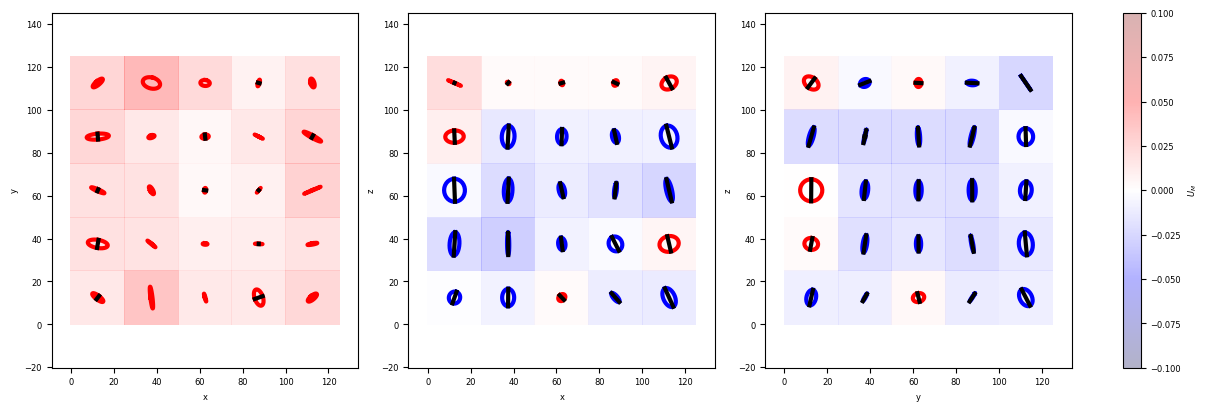

In [19]:
ProjTensor3D(Grids,
            CoordGrd,
            TextureAVG, 
            TextureCount,
            scale_factor = 150,
            figblocksize=4,
            vmin=-0.1,
            vmax=0.1,
            Countmin=5,
            showscale=False,
            nameaxes=['z','y','x'],
            DeviatoricType=3, #<- 3 for dealing with shape: Texture -> Strain
            colorbarlab=r'$U_M$')

## F) Stress - Measured from the interface curvature (Batchelor stress tensor)
The last but maybe one of the most interesting tool. 

Batchelor established an expression for the elastic stress emerging from the local structure of a suspension of fluid particles in a continuous liquid phase, such as liquid foams and emulsions. The elastic stress tensor induced by the surface tension over all the interfaces bounding any given bubble takes the following form:

\begin{equation}
    \sigma_{ij} = \frac{\Gamma}{V} \oint_S (\delta_{ij} - n_i n_j) dS
\end{equation}

where $V$ and $S$ refer to the individual bubble volume and interface area, and $\Gamma$ to the surface tension.

This stress tensor measure $\sigma_{ij}$ was implemented in 3D and evaluated for each individual bubble by integrating over all liquid-gas interfaces surrounding it. The local stress measurement was validated \textit{via} a tomo-rheoscopy setup under a quasi-static liquid foam flow regime [Multiscale stress dynamics in sheared liquid foams revealed by tomo-rheoscopy](https://www.nature.com/articles/s41467-025-64412-z).

The individual bubble stress tensor measure can be obtained batchwise with the function **Batchelor_Batch**. Each bubble interface is meshed thank's to a scikit-image function [mesh_surface_area](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.mesh_surface_area). The tensor is integrated thank's to a modified function form PoreSpy [mesh_surface_area](https://porespy.org/autoapi/porespy/metrics/mesh_surface_area.html#porespy.metrics.mesh_surface_area).

In [20]:
dir_Stress = 'Q6_Stress/'
name_Stress = 'Stress_'

Batchelor_Batch(namenoedge, 
                name_Stress, 
                dirnoedge, 
                dir_Stress, 
                imrange, 
                verbose=True, 
                endread='.tiff', 
                endsave='.tsv', 
                n0=3)

Path exist: True


100%|██████████| 914/914 [00:36<00:00, 25.35it/s]


Stress_001: done


100%|██████████| 905/905 [00:35<00:00, 25.48it/s]


Stress_002: done


100%|██████████| 907/907 [00:35<00:00, 25.75it/s]


Stress_003: done


100%|██████████| 908/908 [00:35<00:00, 25.74it/s]


Stress_004: done


100%|██████████| 912/912 [00:35<00:00, 25.64it/s]


Stress_005: done


100%|██████████| 915/915 [00:35<00:00, 25.74it/s]


Stress_006: done


100%|██████████| 907/907 [00:35<00:00, 25.66it/s]


Stress_007: done


100%|██████████| 916/916 [00:35<00:00, 25.54it/s]


Stress_008: done


100%|██████████| 913/913 [00:35<00:00, 25.60it/s]


Stress_009: done


100%|██████████| 920/920 [00:35<00:00, 25.62it/s]


Stress_010: done


The stress tensor table is looking like this. The integral tensor term is saved as 'B11','B12','B22', ... (1,2,3 for z,y,x). The 'bii' are the 'Bii' divided by the bubble volume $V$. In order to obtain a physical result in $Pa$ we multiply the 'b' tensor by the surface tension and divide it by the pixel size.  

In [21]:
df = pd.read_csv(dir_Stress+name_Stress+strindex(1,n0=3)+'.tsv',sep = '\t')
display(df)

,lab,z,y,x,vol,mesharea,B11,B12,B13,B22,B23,B33,b11,b12,b13,b22,b23,b33
0,1,6.661077,57.085613,65.375993,1133.0,530.131632,347.224586,-8.305241,-4.858150,362.775857,4.003991,350.262822,0.306465,-0.007330,-0.004288,0.320191,0.003534,0.309146
1,2,7.576789,85.936300,50.280105,1146.0,532.711600,356.516145,14.225682,-3.568833,361.246971,-3.376918,347.660084,0.311096,0.012413,-0.003114,0.315224,-0.002947,0.303368
2,3,7.570736,87.444767,108.598837,1032.0,496.835759,336.349988,-3.214842,7.356491,326.936931,-3.968081,330.384599,0.325921,-0.003115,0.007128,0.316799,-0.003845,0.320140
3,4,8.201754,15.444444,68.452242,1026.0,495.695428,337.408151,7.416285,5.955254,327.181293,-10.878530,326.801412,0.328858,0.007228,0.005804,0.318890,-0.010603,0.318520
4,5,7.827060,16.074262,110.963377,983.0,482.768796,333.499853,2.053579,-5.124603,311.849789,-6.876552,320.187950,0.339267,0.002089,-0.005213,0.317243,-0.006995,0.325725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,910,116.492625,18.975418,46.282203,1017.0,488.822264,323.210809,15.276922,-4.846407,327.862389,-0.861608,326.571329,0.317808,0.015022,-0.004765,0.322382,-0.000847,0.321112
910,911,115.678241,65.150463,84.888889,864.0,438.099961,285.107255,-4.675817,2.676009,298.311441,0.516148,292.781226,0.329985,-0.005412,0.003097,0.345268,0.000597,0.338867
911,912,116.231437,104.715526,42.981678,1037.0,498.807998,326.034328,-1.778860,-1.914588,340.800777,-3.012271,330.780890,0.314401,-0.001715,-0.001846,0.328641,-0.002905,0.318979
912,913,117.108756,16.835023,25.201843,1085.0,511.617671,354.539499,6.621541,-7.160703,339.097694,0.361293,329.598149,0.326765,0.006103,-0.006600,0.312532,0.000333,0.303777


As above, let's reshape these table data in two lists, one for the coordinates, one for the stress tensors.
Then, let's average these in space and time in a 5x5x5 grid over [0,125] pixel range over the z,y and x coordinates.

In [22]:
# Take into acount the whole time serie data
pixsize=2.75e-6#um
surftension=21.1e-3#N/m

LLCoord=[]
LLStress=[]
for imi in range(len(imrange)):
    df = pd.read_csv(dir_Stress+name_Stress+strindex(imrange[imi],n0=3)+'.tsv',sep = '\t')

    LCoord = np.asarray(df[['z','y','x']])

    numpy_stress = np.asarray(df[['b11','b12','b13',
                                 'b12','b22','b23',
                                 'b13','b23','b33']])*surftension/pixsize
    LStress=[]
    for bbli in range(len(numpy_stress)):
        LStress.append(numpy_stress[bbli].reshape(3,3))

    LLCoord.append(LCoord)
    LLStress.append(LStress)

Grids_sig, CoordGrd_sig, SigAVG, SigSTD, SigCount = Grid_Tavg(np.concatenate(LLCoord),
                                                              np.concatenate(LLStress),
                                                              Range = [0,125,0,125,0,125],
                                                              N=[5,5,5], 
                                                              NanFill=True,
                                                              verbose=False,
                                                              structured=True)

Once again we can represent the obtained stress tensors $\sigma$ by using the **ProjTensor3D** function. 

Normal min/max ax0 3.4312653495638075 42.71626294661503
Normal min/max ax1 -39.308904744330924 16.341617579156804
Normal min/max ax2 -36.99381377909512 18.00403464878727


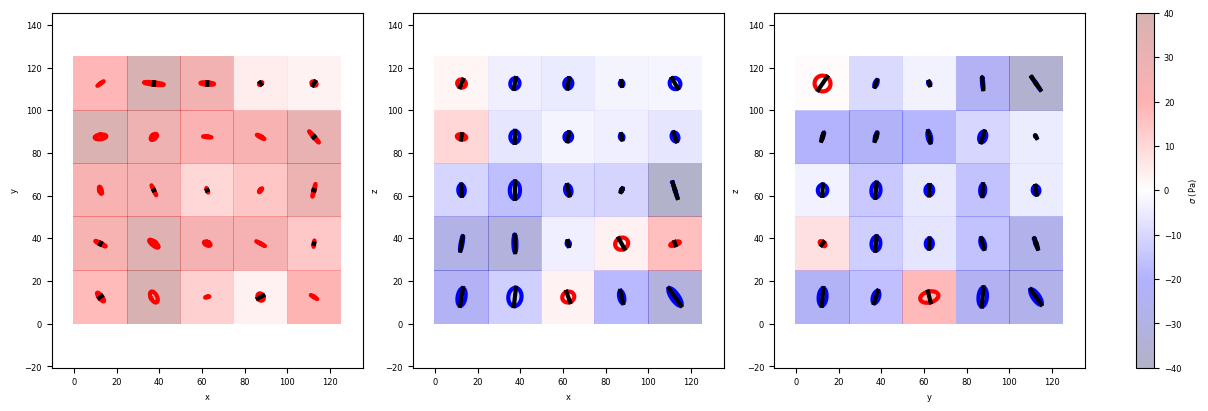

In [23]:
ProjTensor3D(Grids_sig,
            CoordGrd_sig,
            SigAVG, 
            SigCount,
            scale_factor = 0.1,
            figblocksize=4,
            vmin=-40,
            vmax=40,
            Countmin=5,
            showscale=False,
            nameaxes=['z','y','x'],
            DeviatoricType=1, #<- 1 for dealing with stress: Full stress tensor -> Deviatoric stress tensor
            colorbarlab=r'$\sigma$ (Pa)')

You have now completed this tutorial. I hope it has been helpfull to you. Go back to [FoamQuant - Examples](https://foamquant.readthedocs.io/en/latest/examples.html) for more examples and tutorials.